<img src = 'https://miro.medium.com/max/1000/1*Hd-bZZFZbrIinBkoUvIjdQ.jpeg' align='left' height="130" width="130">

<body>
    <nav class="navbar navbar-expand-lg" style="background-color: #071D49 !important; padding: 0px; padding-left: 15px">
        <a class="navbar-brand"  style="color:#fff;text-decoration: none">Targeting Analytics</a>
    </nav>
</body>

In [34]:
#################### Imports ###################

from ipywidgets import widgets, Layout, interact, interactive
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
############### Button functions ###############

def data_management_onclick(obj):
    clear_output()
    start_master()
    # Set the active tab to green
    master_selector_hbox.children[0].style.button_color  = 'lightgreen'
    # Set inactive tabs to gray
    master_selector_hbox.children[1].style.button_color  = 'lightgray'
    display(data_management_master)

def valuation_onclick(obj):
    clear_output()
    start_master()
    # Set the active tab to green
    master_selector_hbox.children[1].style.button_color  = 'lightgreen'
    # Set inactive tabs to gray
    master_selector_hbox.children[0].style.button_color  = 'lightgray'
    display(valuation_master)
    
def start_master():
    master_selector_hbox.children[0].style.button_color  = 'lightgray'
    master_selector_hbox.children[1].style.button_color  = 'lightgray'
    display(master_selector_hbox)
#     df = pd.read_csv('country details.csv')
    
def plot_table(obj):
    df = pd.read_csv('country details.csv')
    data_management_onclick(None)
    
    if file_name_list.value is not None and transformation_list.value is not None and filter_column_value.value\
    is not None and filter_column_list.value is not None and len(filter_column_value.value) > 0 and\
    metric_column_list.value is not None:
        
        cleaned_value = filter_column_value.value.replace("'","").replace('"',"").replace(" ","")
        if cleaned_value[-1] == ",":
            cleaned_value = cleaned_value[-1:]
        country_list = cleaned_value.split(",")
        df = df.loc[df['Country'].isin(country_list)]
        if len(df)>0:
            df.plot(kind='bar',x='Country',y=metric_column_list.value)
            plt.show()
        else:
            print('No results!')
        
    else:
        print('enter all values to continue')
    

In [70]:
############### Frontend UI code ###############

data_management_master_button =  widgets.Button(
    description = 'Data Management',
    icon = 'database',
    style = {'button_color': 'lightgray'},
)

valuation_master_button =  widgets.Button(
    description = 'Valuation',
    icon = 'check-circle',
    style = {'button_color': 'lightgray'},
)

master_selector_hbox = widgets.HBox([data_management_master_button, valuation_master_button])

master_selector_hbox.children[0].on_click(data_management_onclick)
master_selector_hbox.children[1].on_click(valuation_onclick)


################# Valuation #################

deciling_scenario_selection_list = widgets.Dropdown(options=['Q1GC'], description='Select scenario:', disabled=False,
                                                    value=None, style = {'description_width': 'initial'})
deciling_universe_selection_list = widgets.Dropdown(options=[''], description='Select file:', disabled=False,
                                                    value=None, style = {'description_width': 'initial'})
deciling_column_selection_dropdown = widgets.SelectMultiple(options=[], description='Columns:', disabled=False,
                                                           style = {'description_width': 'initial'})
deciling_scenario_selection_list.layout.width = '200px'
deciling_universe_selection_list.layout.width = '200px'
deciling_column_selection_dropdown.layout.width = '200px'

deciling_generate_button = widgets.Button(description='Generate', disabled=False, button_style='success',
                                          tooltip='Click Generate after columns are inputted')
deciling_save_button = widgets.Button(description='Save to S3', disabled=False, button_style='info',
                                          tooltip='Click Generate after columns are inputted')
deciling_clear_button = widgets.Button(description='Clear and Retry', disabled=False, button_style='danger',
                                       tooltip='Click to clear')


deciling_selections_vbox = widgets.VBox([deciling_scenario_selection_list,deciling_universe_selection_list,
                                     deciling_column_selection_dropdown])

deciling_buttons_vbox = widgets.VBox([deciling_generate_button, deciling_save_button])
deciling_buttons_vbox.layout.width = '30%'

# Column select vbox
list_of_boxes = []
for i in range(0, 10):
    text_box = widgets.Text(
        value='',
        placeholder='enter column',
        description='Decile-{}:'.format(i + 1),
        disabled=False)
    list_of_boxes.append(text_box)
options_VBOX = widgets.VBox(list_of_boxes)

deciling_master_hbox = widgets.HBox([deciling_selections_vbox, options_VBOX, deciling_buttons_vbox])


# Valuation - master tab:

valuation_master = widgets.Tab()
valuation_master.set_title(0, 'Deciling')
valuation_master.set_title(1, 'Segmentation')
valuation_master.set_title(2, 'K-Means Clustering')

in_progress_textbox = widgets.Text(
        value='In Progress!',
        disabled=False)

valuation_master.children = [deciling_master_hbox, in_progress_textbox, in_progress_textbox]

In [71]:
############### Data Management ###############
file_name_list = widgets.Dropdown(options=['country details'],description='File Name:',disabled=False, value=None,
                                 style = {'description_width': 'initial'})
transformation_list = widgets.Dropdown(options=['Filter'],description='Transform:',disabled=False, value=None,
                                      style = {'description_width': 'initial'})
filter_column_list = widgets.Dropdown(options=['Country'],description='Select filter column:',disabled=False, value=None,
                                     style = {'description_width': 'initial'})
filter_column_value = widgets.Text(description='Filter value:', placeholder= "Country 1, Country 2, Country 3 ...",
                               disabled=False, value=None,style = {'description_width': 'initial'})
metric_column_list = widgets.Dropdown(options=['Area(sq km)','GDP','Population'],description='Select metric column:',
                                      disabled=False, value=None, style = {'description_width': 'initial'})

# cols_list = widgets.SelectMultiple(options=df.columns,description='Output columns:',disabled=False,
#                                    style = {'description_width': 'initial'})
# # cols_list.layout.width = "500px"
# where_condn_box = widgets.Text(description='Condition:', placeholder= "where (column) in '(value)'",
#                                disabled=False, value=None)
generate_button = widgets.Button(description='Generate',disabled= False,button_style='success',
                                tooltip='Click Generate after columns are inputted')

data_management_master = widgets.VBox([file_name_list, transformation_list, filter_column_list, filter_column_value, 
                                       metric_column_list, generate_button])

# def checker():
#     if file_name_list.value is not None and transformation_list.value is not None:
#         generate_button.disabled = False

# interactive(checker, x = [None, 'hi'])
generate_button.on_click(plot_table)

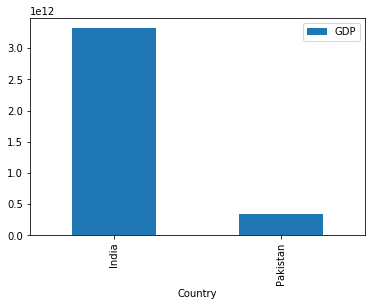

In [72]:
start_master()

<a href="https://github.com/gokaai/binder/blob/master/country%20details.csv">View the full dataset used for this demo by clicking on this link!</a>